In [1]:
from ast import literal_eval

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('data/processed/gurgaon_10k.csv')
print(df.shape)
df.head()

(10205, 24)


,SPID,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,SECONDARY_TAGS,TOTAL_LANDMARK_COUNT,FORMATTED_LANDMARK_DETAILS,MAP_DETAILS,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,location,FURNISH,FACING,AGE,TOTAL_FLOOR,FEATURES,BEDROOM_NUM,AMENITIES,PROP_NAME,BALCONY_NUM,FLOOR_NUM
0,70597758,h70597758,gurgaon,31900000.0,20202.0,1579.0,"['under construction', 'new booking', 'rera']",9.0,"[{'text': '1 metro station'}, {'text': '1 shop...","{'latitude': '28.532594', 'longitude': '77.020...",3 bhk flat in sector 113 gurgaon,"there is a 3 bhk apartment in sector 113, gurg...",residential apartment,"{'city': '8', 'city_name': 'gurgaon', 'buildin...",0,0,5,25.0,n,3.0,NaN,la vida by tata housing,NaN,1.0
1,70436188,h70436188,gurgaon,18500000.0,9135.0,2025.0,"['ready to move', 'new booking', 'rera']",12.0,"[{'text': '1 metro station'}, {'text': '1 shop...","{'latitude': '28.3855771', 'longitude': '76.97...",3 bhk flat in sector 77 gurgaon,let your dream of owning a flat come true with...,residential apartment,"{'city': '8', 'city_name': 'gurgaon', 'buildin...",0,0,6,24.0,n,3.0,NaN,emaar palm heights,NaN,1.0
2,70217014,l70217014,gurgaon,120600000.0,42736.0,2822.0,"['under construction', 'new booking', 'rera']",9.0,"[{'text': '1 metro station'}, {'text': '1 shop...","{'latitude': '28.4350568', 'longitude': '77.10...",5 bhk flat in sector 53 gurgaon,tulip monsella offers 5 bhk flats in sector 53...,residential apartment,"{'city': '8', 'city_name': 'gurgaon', 'buildin...",0,0,5,20.0,n,5.0,NaN,tulip monsella,NaN,1.0
3,70217012,x70217012,gurgaon,95300000.0,42736.0,2229.0,"['under construction', 'new booking', 'rera']",9.0,"[{'text': '1 metro station'}, {'text': '1 shop...","{'latitude': '28.4350568', 'longitude': '77.10...",4 bhk flat in sector 53 gurgaon,tulip monsella offers 4 bhk flats in sector 53...,residential apartment,"{'city': '8', 'city_name': 'gurgaon', 'buildin...",0,0,5,20.0,n,4.0,NaN,tulip monsella,NaN,1.0
4,70217010,a70217010,gurgaon,72000000.0,43834.0,1642.0,"['under construction', 'new booking', 'rera']",9.0,"[{'text': '1 metro station'}, {'text': '1 shop...","{'latitude': '28.4350568', 'longitude': '77.10...",3 bhk flat in sector 53 gurgaon,tulip monsella offers 3 bhk apartments in sect...,residential apartment,"{'city': '8', 'city_name': 'gurgaon', 'buildin...",0,0,5,20.0,n,3.0,NaN,tulip monsella,NaN,1.0


In [4]:
df.columns

Index(['SPID', 'PROP_ID', 'CITY', 'PRICE', 'PRICE_SQFT', 'AREA',
       'SECONDARY_TAGS', 'TOTAL_LANDMARK_COUNT', 'FORMATTED_LANDMARK_DETAILS',
       'MAP_DETAILS', 'PROP_HEADING', 'DESCRIPTION', 'PROPERTY_TYPE',
       'location', 'FURNISH', 'FACING', 'AGE', 'TOTAL_FLOOR', 'FEATURES',
       'BEDROOM_NUM', 'AMENITIES', 'PROP_NAME', 'BALCONY_NUM', 'FLOOR_NUM'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10205 entries, 0 to 10204
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SPID                        10205 non-null  int64  
 1   PROP_ID                     10205 non-null  object 
 2   CITY                        10205 non-null  object 
 3   PRICE                       10205 non-null  float64
 4   PRICE_SQFT                  10205 non-null  float64
 5   AREA                        10205 non-null  float64
 6   SECONDARY_TAGS              10205 non-null  object 
 7   TOTAL_LANDMARK_COUNT        10090 non-null  float64
 8   FORMATTED_LANDMARK_DETAILS  10090 non-null  object 
 9   MAP_DETAILS                 10205 non-null  object 
 10  PROP_HEADING                10205 non-null  object 
 11  DESCRIPTION                 10205 non-null  object 
 12  PROPERTY_TYPE               10205 non-null  object 
 13  location                    102

In [6]:
df.isnull().sum()

SPID                             0
PROP_ID                          0
CITY                             0
PRICE                            0
PRICE_SQFT                       0
AREA                             0
SECONDARY_TAGS                   0
TOTAL_LANDMARK_COUNT           115
FORMATTED_LANDMARK_DETAILS     115
MAP_DETAILS                      0
PROP_HEADING                     0
DESCRIPTION                      0
PROPERTY_TYPE                    0
location                         0
FURNISH                          0
FACING                           0
AGE                              0
TOTAL_FLOOR                     51
FEATURES                         0
BEDROOM_NUM                   1002
AMENITIES                      275
PROP_NAME                     1838
BALCONY_NUM                   1152
FLOOR_NUM                     1731
dtype: int64

## CITY

In [7]:
df['CITY'].value_counts()

CITY
gurgaon    10205
Name: count, dtype: int64

## SECONDARY_TAGS

In [8]:
df['SECONDARY_TAGS'].sample(5)

8740    ['ready to move', 'resale', 'rera']
7129            ['ready to move', 'resale']
5787            ['ready to move', 'resale']
5657            ['ready to move', 'resale']
4541    ['ready to move', 'resale', 'rera']
Name: SECONDARY_TAGS, dtype: object

In [9]:
df['SECONDARY_TAGS'] = df['SECONDARY_TAGS'].apply(literal_eval)

In [10]:
df['SECONDARY_TAGS'].explode().unique()

array(['under construction', 'new booking', 'rera', 'ready to move',
       'resale', 'new launch', 'north facing', 'in gated community',
       'huda approved', 'hsiidc approved', 'hhb approved',
       'corner property', 'for single men', 'for single women', nan,
       'furnished', 'east facing', 'north-east facing',
       'authority approved'], dtype=object)

I think `SECONDARY_TAGS` is not a important feature it contains diiferent values which already some feature in the dataset like _facing, furnished, approved, etc._

## TOTAL_LANDMARK_COUNT

In [11]:
df['TOTAL_LANDMARK_COUNT'].sample(7)

6080    10.0
8544     9.0
9662     7.0
9912     6.0
5502    12.0
1227    15.0
4785     5.0
Name: TOTAL_LANDMARK_COUNT, dtype: float64

In [12]:
df['TOTAL_LANDMARK_COUNT'].isnull().sum()

115

In [13]:
df[df['TOTAL_LANDMARK_COUNT'].isnull()].head()

,SPID,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,SECONDARY_TAGS,TOTAL_LANDMARK_COUNT,FORMATTED_LANDMARK_DETAILS,MAP_DETAILS,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,location,FURNISH,FACING,AGE,TOTAL_FLOOR,FEATURES,BEDROOM_NUM,AMENITIES,PROP_NAME,BALCONY_NUM,FLOOR_NUM
85,70362812,s70362812,gurgaon,58500000.0,32500000.0,87120.0,"[ready to move, resale]",NaN,NaN,"{'latitude': '28.237599', 'longitude': '77.149...",4 bedroom farm house in sohna,"discover your dream farmhouse in sohna, haryan...",farm house,"{'city': '8', 'city_name': 'gurgaon', 'buildin...",2,3,6,2.0,"44,23,24,46,25,5,6,19,9,40,42",4.0,"5,44,23,24,46,6,19,9,40,42,25",vatika westin sohna resort,2.0,NaN
191,64979146,b64979146,gurgaon,147500000.0,1354.0,108900.0,"[ready to move, resale]",NaN,NaN,"{'latitude': '28.237599', 'longitude': '77.149...",6 bedroom farm house in sohna,a fully developed farmhouse at prime location ...,farm house,"{'city': '8', 'city_name': 'gurgaon', 'buildin...",1,5,1,1.0,"1,24,26,6,19,9",6.0,"1,24,6,19,9,26,101,102,103",vatika westin sohna resort,3.0,NaN
192,69367944,d69367944,gurgaon,29000000.0,29000000.0,43560.0,"[ready to move, resale]",NaN,NaN,"{'latitude': '28.237599', 'longitude': '77.149...",4 bedroom farm house in sohna,vatika westin resort sohna fram house sale 1 a...,farm house,"{'city': '8', 'city_name': 'gurgaon', 'buildin...",4,5,6,1.0,"23,1,24,26,5,6,19,9",4.0,"5,23,1,24,6,19,9,26",vatika farm westin sohna resort,2.0,NaN
222,70248948,n70248948,gurgaon,5100000.0,41202.0,1114.0,"[hsiidc approved, under construction, resale]",NaN,NaN,"{'latitude': '28.513805', 'longitude': '76.858...",residential land / plot in badsa,check out this plot for sale in sector 99a gur...,residential land,"{'city': '8', 'city_name': 'gurgaon', 'buildin...",0,0,0,4.0,n,NaN,NaN,NaN,NaN,NaN
238,69154818,j69154818,gurgaon,175000000.0,175000.0,9000.0,"[corner property, north facing, in gated commu...",NaN,NaN,"{'latitude': '77.02664', 'longitude': '28.4595'}",residential land / plot in ansal palam vihar,it is a three side open freehold plot in k blo...,residential land,"{'city': '8', 'city_name': 'gurgaon', 'buildin...",0,1,0,0.0,23,NaN,23,NaN,NaN,NaN


Maybe, `TOTAL_LANDMARK_COUNT` is not a better feature for the project because it just contains the count of important places near the property.

Instead `FORMATTED_LANDMARK_DETAILS` is better because it contains the no. places type near the property.

## FORMATTED_LANDMARK_DETAILS

In [14]:
df['FORMATTED_LANDMARK_DETAILS'].sample(7)

6216    [{'text': '2 shoppings'}, {'text': '6 educatio...
1453    [{'text': '1 metro station'}, {'text': '1 shop...
1238    [{'text': '1 shopping'}, {'text': '3 connectiv...
3595    [{'text': '2 metro stations'}, {'text': '6 atm...
2861    [{'text': '1 metro station'}, {'text': '1 shop...
8254    [{'text': '1 metro station'}, {'text': '2 conn...
7965    [{'text': '5 metro stations'}, {'text': '1 rel...
Name: FORMATTED_LANDMARK_DETAILS, dtype: object

In [15]:
df['FORMATTED_LANDMARK_DETAILS'] = df['FORMATTED_LANDMARK_DETAILS'].fillna('[]').apply(literal_eval)

In [16]:
df['FORMATTED_LANDMARK_DETAILS'] = df['FORMATTED_LANDMARK_DETAILS'].apply(
    lambda x: [i['text'] for i in x]
)

In [17]:
df['FORMATTED_LANDMARK_DETAILS'].sample(7).values

array([list(['1 metro station', '1 shopping', '1 connectivity', '2 educations', '1 hospital', '1 airport', '1 railway station', '1 office complex', '1 hotels', '1 amusement park', '1 golf course', '1 stadium']),
       list(['1 religious place', '2 atms', '18 hospitals', '1 attraction', '3 pharmacys', '2 office complexes', '1 miscellaneous']),
       list([]),
       list(['2 atms', '17 hospitals', '1 attraction', '3 pharmacys', '1 office complex', '1 miscellaneous', '1 swimming pool']),
       list(['1 metro station', '2 connectivities', '5 educations', '4 hospitals']),
       list(['1 metro station', '1 shopping', '2 connectivities', '1 education', '1 hospital', '1 airport', '1 golf course']),
       list(['1 religious place', '2 atms', '18 hospitals', '1 attraction', '3 pharmacys', '2 office complexes', '1 miscellaneous'])],
      dtype=object)

In [18]:
unique_landmarks = (
    df['FORMATTED_LANDMARK_DETAILS']
    .explode()
    .str.split(' ', n=1)
    .str.get(-1)
    .str.replace('ss', 's')
    .str.removesuffix('s')
    .unique()
    .tolist()
)
print(len(unique_landmarks))
unique_landmarks

28


['metro station',
 'shopping',
 'connectivitie',
 'education',
 'hospital',
 'airport',
 'railway station',
 'connectivity',
 'hotel',
 'amusement park',
 'golf course',
 'stadium',
 'club',
 'office complex',
 'atm',
 'pharmacy',
 'miscellaneou',
 'library',
 'religious place',
 'office complexe',
 'attraction',
 'parking',
 'swimming pool',
 'bank',
 'park',
 nan,
 'bus stop',
 'bus depot']

In [19]:
landmark_groups = {
    "Transportation": ["station", "bus", "airport"],
    "Accommodation": ["hotel", "office"],
    "Leisure": ["park", "stadium", "club", "pool", "golf"],
    "Shopping": ["shopping", "mall"],
    "Education": ["education", "library"],
    "Health": ["hospital", "pharmacy"],
    "Other": [
        "religious",
        "connect",
        "atm",
        "bank",
        "attraction",
        "miscellaneou",
        "parking",
    ],
}

Create different feature using `landmark_groups`'s `dict_keys()`.

## MAP_DETAILS

In [20]:
df['MAP_DETAILS'].sample(5)

235     {'latitude': '28.4432913', 'longitude': '77.05...
8295    {'latitude': '28.4489007', 'longitude': '77.05...
8143    {'latitude': '28.450266', 'longitude': '77.049...
5108    {'latitude': '28.4247815', 'longitude': '77.03...
9792    {'latitude': '28.456103', 'longitude': '76.954...
Name: MAP_DETAILS, dtype: object

In [21]:
df['MAP_DETAILS'] = df['MAP_DETAILS'].apply(literal_eval)

In [22]:
df['LATITUDE'] = df['MAP_DETAILS'].str.get('latitude')  # type: ignore
df['LONGITUDE'] = df['MAP_DETAILS'].str.get('longitude')  # type: ignore

In [23]:
df[['LATITUDE', 'LONGITUDE']].isnull().sum()

LATITUDE     0
LONGITUDE    0
dtype: int64

In [24]:
df[['LATITUDE', 'LONGITUDE']].sample(5)

,LATITUDE,LONGITUDE
859,28.4350568,77.1013666
9275,28.454279,77.085314
2602,28.478391,77.076817
869,28.40874,77.05731
7623,28.48041,77.079157


## PROP_HEADING

In [25]:
df['PROP_HEADING'].sample(7)

7119                      3 bhk flat in sector 83 gurgaon
4009                3 bedroom house in sector 70a gurgaon
1566                      4 bhk flat in sector 62 gurgaon
6162                     3 bhk flat in sector 102 gurgaon
5005    2 bhk independent builder floor in sector 92 g...
1790                        4 bhk flat in nirvana country
6883                     residential land / plot in sohna
Name: PROP_HEADING, dtype: object

In [26]:
df['PROP_HEADING'][df['PROP_HEADING'].str.contains('bhk|bed') == False]

25          residential land / plot in sector-33 sohna
34              residential land / plot in dlf phase 1
74          residential land / plot in sector-33 sohna
79              residential land / plot in palam vihar
82       residential land / plot in sector 82a gurgaon
                             ...                      
10054     residential land / plot in sector 88 gurgaon
10055     residential land / plot in sector 83 gurgaon
10066     residential land / plot in sector 55 gurgaon
10098     residential land / plot in sector 38 gurgaon
10203           residential land / plot in palam vihar
Name: PROP_HEADING, Length: 1041, dtype: object

In [27]:
df['BHK_BED'] = df['PROP_HEADING'].str.extract(r'(\d+) (?:bed|bhk)').astype(float)

In [28]:
df['BHK_BED'].value_counts()

BHK_BED
3.0     4562
4.0     2618
2.0     1397
5.0      263
1.0      158
6.0       56
9.0       26
10.0      16
8.0       16
7.0       13
12.0      13
13.0       4
20.0       3
18.0       3
16.0       3
11.0       3
35.0       3
36.0       2
15.0       1
24.0       1
55.0       1
34.0       1
14.0       1
Name: count, dtype: int64

## DESCRIPTION

In [29]:
df['DESCRIPTION'].sample(7)

3607            floor for sale \nin vipul world sector 48
4925    trehan ashoka estate lowrise luxurious floors ...
1345    park facing , best location \nalso available \...
8693    check out this 3 bhk apartment for sale in ema...
9647    ready to move in property. call for more detai...
9811    pareena laxmi appartment \navailable for sell ...
1386    this is the fully furnished service apartment ...
Name: DESCRIPTION, dtype: object

In [30]:
df['DESCRIPTION'] = df['DESCRIPTION'].str.replace('\n', ' ')

## PROPERTY_TYPE

In [31]:
df['PROPERTY_TYPE'].sample(5)

9812    independent/builder floor
3442        residential apartment
6094        residential apartment
3343    independent/builder floor
4196    independent/builder floor
Name: PROPERTY_TYPE, dtype: object

In [32]:
df['PROPERTY_TYPE'].value_counts()

PROPERTY_TYPE
residential apartment        5952
independent/builder floor    2470
residential land              989
independent house/villa       621
farm house                    120
studio apartment               39
serviced apartments            10
other                           4
Name: count, dtype: int64

In [33]:
diff_prop_type = df['PROPERTY_TYPE'].unique().tolist()
diff_prop_type

['residential apartment',
 'independent/builder floor',
 'independent house/villa',
 'residential land',
 'farm house',
 'serviced apartments',
 'studio apartment',
 'other']

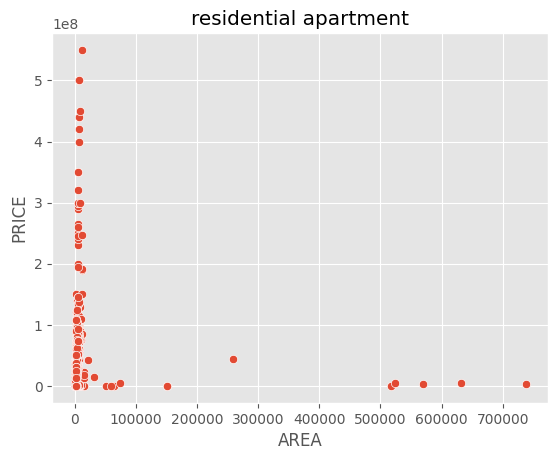

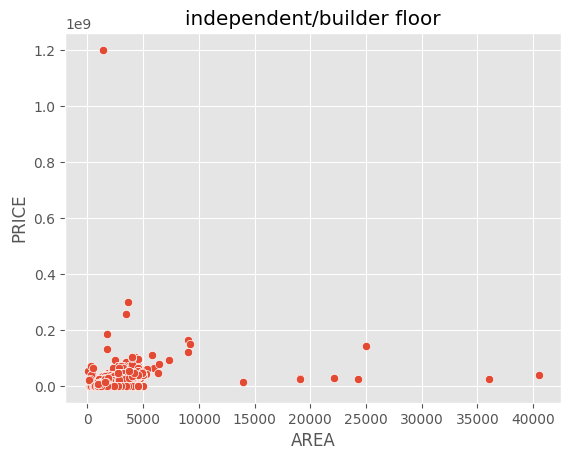

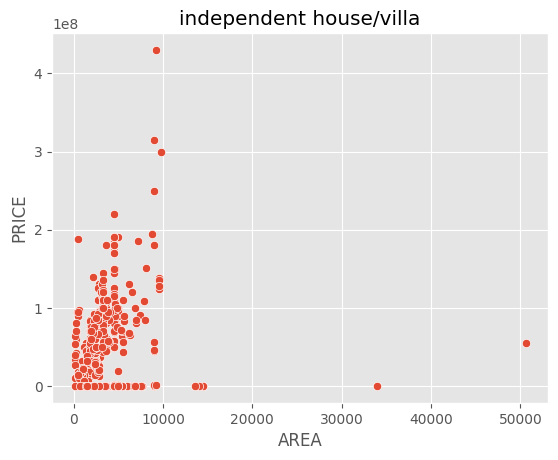

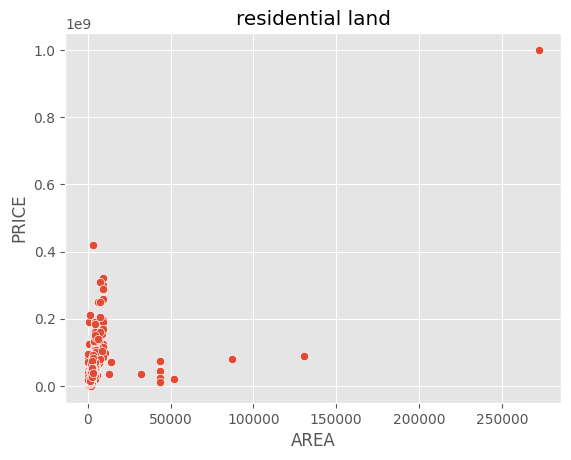

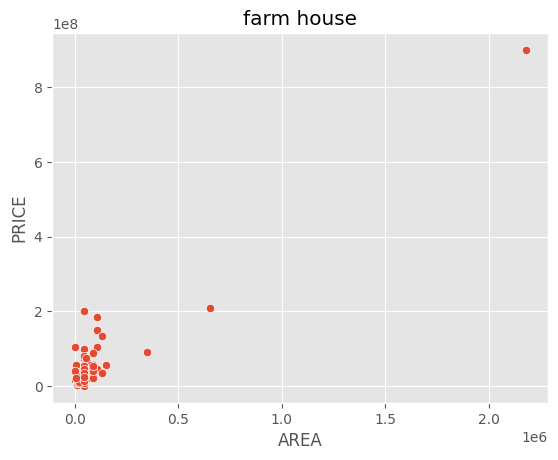

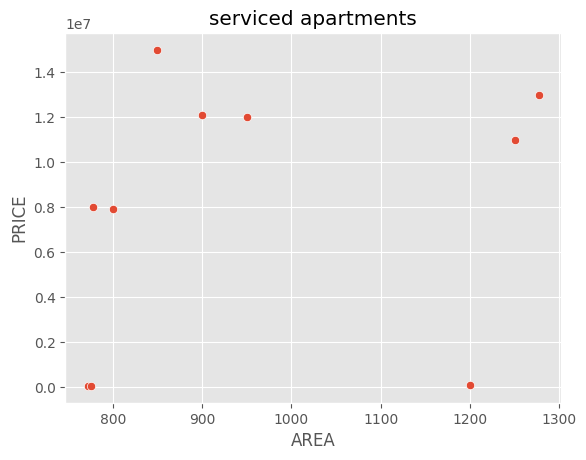

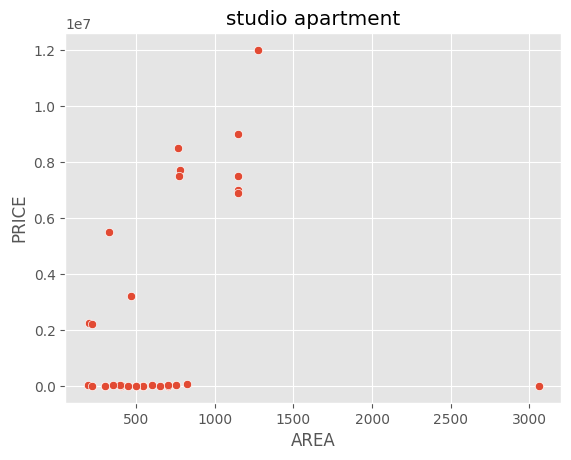

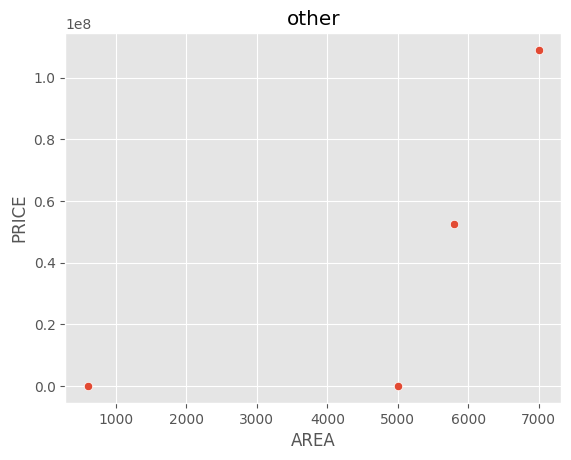

In [34]:
for prop_type in diff_prop_type:
    plt.figure()
    sns.scatterplot(df.query("PROPERTY_TYPE==@prop_type"), x='AREA', y='PRICE')

    plt.title(prop_type)

We does not require the heavy properties like `"studio apartment", "serviced apartment"` because they are extremly expensive. So I am going to drop them.

`"farm house"` is also costly but I leave it for now.

In [35]:
temp = df[df['PROPERTY_TYPE'].isin(["studio apartment", "serviced apartment", "other"])]
df.drop(index=temp.index, inplace=True)
df.shape

(10162, 27)

## location

In [36]:
df['location'].sample(7)

909     {'city': '8', 'city_name': 'gurgaon', 'buildin...
3846    {'city': '8', 'city_name': 'gurgaon', 'buildin...
6361    {'city': '8', 'city_name': 'gurgaon', 'buildin...
4479    {'city': '8', 'city_name': 'gurgaon', 'buildin...
1084    {'city': '8', 'city_name': 'gurgaon', 'buildin...
6910    {'city': '8', 'city_name': 'gurgaon', 'buildin...
4561    {'city': '8', 'city_name': 'gurgaon', 'buildin...
Name: location, dtype: object

In [37]:
df['location'] = df['location'].str.replace('none', 'None').apply(literal_eval)

In [38]:
df['location'].explode().unique()

array(['city', 'city_name', 'building_id', 'building_name',
       'society_name', 'locality_id', 'locality_name', 'address'],
      dtype=object)

In [39]:
df['LOCALITY_NAME'] = df['location'].str.get('locality_name')  # type: ignore
df['BUILDING_NAME'] = df['location'].str.get('building_name')  # type: ignore
df['SOCIETY_NAME'] = df['location'].str.get('society_name')  # type: ignore
df['ADDRESS'] = df['location'].str.get('address')  # type: ignore

## FURNISH

In [40]:
df['FURNISH'].sample(5)

8543    0
1600    4
8787    2
5521    4
7008    4
Name: FURNISH, dtype: int64

In [41]:
df['FURNISH'].value_counts()

FURNISH
4    6831
0    1391
1     979
2     961
Name: count, dtype: int64

In [42]:
furnish_df = pd.read_csv('data/facets/FURNISH.csv')
print(furnish_df.shape)
furnish_df.head()

(3, 2)


,id,label
0,1,Furnished
1,2,Unfurnished
2,4,Semifurnished


In [43]:
furnish_dict = furnish_df.set_index('id').to_dict()['label']
furnish_dict

{1: 'Furnished', 2: 'Unfurnished', 4: 'Semifurnished'}

In [44]:
furnish_dict.update({0: 'not available'})
df['FURNISH'] = df['FURNISH'].map(furnish_dict)
df['FURNISH'].value_counts()

FURNISH
Semifurnished    6831
not available    1391
Furnished         979
Unfurnished       961
Name: count, dtype: int64

## FACING

In [45]:
df['FACING'].sample(5)

9503    5
4742    5
7181    5
1098    5
2215    3
Name: FACING, dtype: int64

In [46]:
df['FACING'].value_counts()

FACING
5    3560
3    2317
1    1366
0    1036
4     571
7     424
6     338
2     314
8     236
Name: count, dtype: int64

In [47]:
facing_df = pd.read_csv('data/facets/FACING_DIRECTION.csv')
print(facing_df.shape)
facing_df.head()

(8, 2)


,id,label
0,1,North
1,2,South
2,3,East
3,4,West
4,5,North-East


In [48]:
facing_dict = facing_df.set_index('id').to_dict()['label']
facing_dict

{1: 'North',
 2: 'South',
 3: 'East',
 4: 'West',
 5: 'North-East',
 6: 'North-West',
 7: 'South-East',
 8: 'South-West'}

In [49]:
facing_dict.update({0: 'not available'})
df['FACING'] = df['FACING'].map(facing_dict)
df['FACING'].value_counts()

FACING
North-East       3560
East             2317
North            1366
not available    1036
West              571
South-East        424
North-West        338
South             314
South-West        236
Name: count, dtype: int64

## AGE

In [50]:
df['AGE'].sample(5)

9470    1
2547    2
133     1
9519    5
9975    6
Name: AGE, dtype: int64

In [51]:
df['AGE'].value_counts()

AGE
1    3757
6    2243
2    1551
5    1013
0     990
3     608
Name: count, dtype: int64

## TOTAL_FLOOR

In [52]:
df['TOTAL_FLOOR'].sample(5)

5748    45.0
1990    12.0
7047     0.0
5601    29.0
9015    40.0
Name: TOTAL_FLOOR, dtype: float64

In [53]:
df['TOTAL_FLOOR'].value_counts()

TOTAL_FLOOR
4.0     2831
3.0      743
14.0     731
2.0      574
18.0     425
19.0     413
24.0     290
20.0     255
32.0     249
26.0     247
17.0     237
30.0     232
12.0     221
29.0     217
13.0     213
15.0     187
22.0     159
1.0      155
25.0     155
40.0     155
21.0     147
16.0     133
10.0      88
27.0      88
23.0      84
35.0      81
34.0      77
8.0       70
5.0       70
39.0      67
11.0      63
28.0      58
36.0      58
33.0      54
42.0      54
9.0       47
51.0      37
0.0       33
7.0       22
38.0      21
47.0      18
6.0       18
31.0      12
43.0       8
45.0       6
41.0       5
44.0       1
50.0       1
48.0       1
Name: count, dtype: int64

## FEATURES

In [54]:
df['FEATURES'].sample(5)

1618    44,23,45,24,46,47,25,26,28,29,30,31,10,32,33,1...
3720    44,23,45,24,46,25,47,26,28,29,30,31,10,32,33,1...
3808    44,23,12,45,24,46,25,26,17,39,29,19,1,2,3,5,6,...
8563            33,12,23,24,47,28,19,1,2,6,40,41,20,31,21
3020                             23,24,25,26,5,6,29,19,32
Name: FEATURES, dtype: object

In [55]:
df['FEATURES'] = df['FEATURES'].str.split(',')
df['FEATURES'].sample(5)

4737    [44, 23, 45, 24, 46, 25, 47, 26, 28, 29, 30, 3...
2545    [44, 23, 24, 46, 25, 47, 26, 28, 29, 30, 31, 1...
9955                                      [23, 6, 20, 21]
6624                       [23, 24, 5, 17, 6, 19, 20, 21]
7135                         [23, 1, 24, 26, 5, 6, 19, 9]
Name: FEATURES, dtype: object

Need to scrape the `FEATURES.csv` to decode these values.

## BEDROOM_NUM

In [56]:
df['BEDROOM_NUM'].sample(5)

5223    4.0
2411    3.0
9233    3.0
3250    3.0
6011    4.0
Name: BEDROOM_NUM, dtype: float64

In [57]:
df['BEDROOM_NUM'].isnull().sum()

998

In [58]:
df['BHK_BED'].isnull().sum()

998

In [59]:
df['BEDROOM_NUM'].value_counts()

BEDROOM_NUM
3.0     4562
4.0     2618
2.0     1397
5.0      263
1.0      158
6.0       56
9.0       26
10.0      16
8.0       16
7.0       13
12.0      13
13.0       4
20.0       3
18.0       3
16.0       3
11.0       3
35.0       3
36.0       2
15.0       1
24.0       1
55.0       1
34.0       1
14.0       1
Name: count, dtype: int64

In [60]:
temp = df[(df['BEDROOM_NUM'] != df['BHK_BED']) & (df['BEDROOM_NUM'].notnull())]

print(temp['BEDROOM_NUM'].value_counts(), end='\n\n')
print(temp['BHK_BED'].value_counts())

Series([], Name: count, dtype: int64)

Series([], Name: count, dtype: int64)


## AMENITIES

In [61]:
df['AMENITIES'].sample(5)

4788    17,5,21,23,24,46,47,19,1,6,9,33,12,25,26,3,31,103
1100                             5,8,23,24,6,19,25,26,103
4487                                               24,103
4427                                                  NaN
6262    10,32,17,5,8,20,21,44,23,45,24,46,47,28,29,30,...
Name: AMENITIES, dtype: object

In [62]:
df['AMENITIES'] = df['AMENITIES'].str.split(',')

In [63]:
df['AMENITIES'].sample(5)

5314                                         [24, 6, 103]
5921    [10, 32, 17, 5, 8, 20, 21, 44, 23, 45, 24, 46,...
2929                                      [5, 23, 24, 26]
4177    [17, 8, 32, 44, 23, 45, 24, 46, 29, 19, 1, 6, ...
5084    [10, 17, 5, 20, 21, 44, 23, 45, 24, 46, 47, 30...
Name: AMENITIES, dtype: object

In order to ddecode this feature we need to scrape the `AMENITIES` encodings from the website.

## PROP_NAME

In [64]:
df['PROP_NAME'].sample(5)

2077                         NaN
397       puri diplomatic greens
9775    bestech park view city 2
8518                 ss the leaf
2331     vatika india next plots
Name: PROP_NAME, dtype: object

In [65]:
df['PROP_NAME'].isnull().sum()

1836

In [66]:
df['PROP_NAME'].value_counts()[:10]

PROP_NAME
emaar digihomes                         168
ss the leaf                             110
shapoorji pallonji joyville gurugram    108
ireo skyon                               95
ireo the corridors                       92
tata primanti                            85
sobha city                               80
adani m2k oyster grande                  78
dlf the ultima                           77
bptp amstoria                            70
Name: count, dtype: int64

## BALCONY_NUM

In [67]:
df['BALCONY_NUM'].sample(5)

5545    2.0
9041    2.0
7444    4.0
1717    3.0
1558    2.0
Name: BALCONY_NUM, dtype: float64

In [68]:
df['BALCONY_NUM'].value_counts()

BALCONY_NUM
4.0    2913
3.0    2809
2.0    2746
1.0     486
0.0      61
Name: count, dtype: int64

## FLOOR_NUM

In [69]:
df['FLOOR_NUM'].sample(5)

9088      14
7912      26
10120      6
4210       9
994      NaN
Name: FLOOR_NUM, dtype: object

In [70]:
df['FLOOR_NUM'].isnull().sum()

1730

In [71]:
df['FLOOR_NUM'].value_counts()[:10]

FLOOR_NUM
2     1056
1     1021
3      674
4      641
7      488
10     468
6      466
8      463
5      454
9      386
Name: count, dtype: int64

# General Step - End

In [72]:
df.columns

Index(['SPID', 'PROP_ID', 'CITY', 'PRICE', 'PRICE_SQFT', 'AREA',
       'SECONDARY_TAGS', 'TOTAL_LANDMARK_COUNT', 'FORMATTED_LANDMARK_DETAILS',
       'MAP_DETAILS', 'PROP_HEADING', 'DESCRIPTION', 'PROPERTY_TYPE',
       'location', 'FURNISH', 'FACING', 'AGE', 'TOTAL_FLOOR', 'FEATURES',
       'BEDROOM_NUM', 'AMENITIES', 'PROP_NAME', 'BALCONY_NUM', 'FLOOR_NUM',
       'LATITUDE', 'LONGITUDE', 'BHK_BED', 'LOCALITY_NAME', 'BUILDING_NAME',
       'SOCIETY_NAME', 'ADDRESS'],
      dtype='object')

In [73]:
df['SPID'].duplicated().sum()

0

In [74]:
df['PROP_ID'].duplicated().sum()

0

In [75]:
df.isnull().sum()

SPID                             0
PROP_ID                          0
CITY                             0
PRICE                            0
PRICE_SQFT                       0
AREA                             0
SECONDARY_TAGS                   0
TOTAL_LANDMARK_COUNT           111
FORMATTED_LANDMARK_DETAILS       0
MAP_DETAILS                      0
PROP_HEADING                     0
DESCRIPTION                      0
PROPERTY_TYPE                    0
location                         0
FURNISH                          0
FACING                           0
AGE                              0
TOTAL_FLOOR                     51
FEATURES                         0
BEDROOM_NUM                    998
AMENITIES                      275
PROP_NAME                     1836
BALCONY_NUM                   1147
FLOOR_NUM                     1730
LATITUDE                         0
LONGITUDE                        0
BHK_BED                        998
LOCALITY_NAME                    0
BUILDING_NAME       

In [76]:
drop_cols = 'SECONDARY_TAGS MAP_DETAILS location'.split(' ')
df.drop(columns=drop_cols, inplace=True)

In [77]:
df.sample(7)

,SPID,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,TOTAL_LANDMARK_COUNT,FORMATTED_LANDMARK_DETAILS,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,FURNISH,FACING,AGE,TOTAL_FLOOR,FEATURES,BEDROOM_NUM,AMENITIES,PROP_NAME,BALCONY_NUM,FLOOR_NUM,LATITUDE,LONGITUDE,BHK_BED,LOCALITY_NAME,BUILDING_NAME,SOCIETY_NAME,ADDRESS
2223,70480680,s70480680,gurgaon,60000.0,24.0,2500.0,46.0,"[1 metro station, 2 religious places, 11 atms,...",4 bhk flat in sector 43 gurgaon,"4bhk with power backup,security,lift,park,shop...",residential apartment,Semifurnished,East,3,10.0,"[44, 33, 23, 46, 47, 25, 26, 17, 39, 29, 19, 1...",4.0,"[17, 2, 5, 20, 21, 44, 23, 46, 47, 39, 29, 19,...",tarika apartments,4.0,6,28.451282,77.077569,4.0,sector 43 gurgaon,tarika apartments,tarika apartments,None
6253,70306202,x70306202,gurgaon,120000000.0,13333.0,9000.0,46.0,"[6 metro stations, 2 religious places, 5 atms,...",independent builder floor in sector 26 gurgaon,1000 sq. yard luxury floor with: - personal li...,independent/builder floor,Semifurnished,North-East,6,4.0,"[23, 26, 5, 6]",NaN,"[5, 23, 6, 26, 101, 102, 103]",dlf city phase 1,3.0,2,28.478236,77.105306,NaN,sector 26 gurgaon,dlf city phase 1,dlf city phase 1,marg 39
6177,70873190,i70873190,gurgaon,23500000.0,19714.0,2086.0,7.0,"[1 shopping, 1 connectivity, 1 education, 1 ho...",3 bhk flat in sector 82a gurgaon,some people want more from life and aren't apo...,residential apartment,Semifurnished,North-West,1,32.0,"[44, 33, 23, 45, 12, 24, 46, 25, 47, 26, 17, 2...",3.0,"[17, 5, 20, 21, 44, 23, 45, 24, 46, 47, 28, 19...",dlf the primus,3.0,b,28.386254,76.966492,3.0,sector 82a gurgaon,dlf the primus,dlf the primus,None
9851,70705302,u70705302,gurgaon,19500000.0,14233.0,1370.0,4.0,"[1 metro station, 1 shopping, 1 amusement park...",3 bhk flat in dlf phase 4,"dlf phase 4, gurgaon, haryana 3bhk, renovated ...",residential apartment,Semifurnished,North-East,2,14.0,"[44, 23, 45, 24, 46, 25, 47, 26, 28, 29, 30, 3...",3.0,"[32, 17, 2, 5, 20, 21, 44, 23, 45, 24, 46, 47,...",dlf ridgewood estate,1.0,6,28.464937,77.080879,3.0,dlf phase 4,dlf ridgewood estate,dlf ridgewood estate,dlf phase 4
10113,70518488,n70518488,gurgaon,22000.0,25.0,850.0,47.0,"[3 metro stations, 2 religious places, 5 atms,...",1 bhk independent builder floor in sector 56 g...,property near by 55-56metro station and sector...,independent/builder floor,Furnished,North-East,1,4.0,"[24, 6, 19]",1.0,"[24, 6, 19, 102, 103]",NaN,1.0,4,28.4256506,77.099613,1.0,sector 56 gurgaon,,,None
8799,70629550,e70629550,gurgaon,50002.0,24.0,2003.0,12.0,"[1 metro station, 1 shopping, 1 connectivity, ...",3 bhk flat in sector 108 gurgaon,find this 3 bhk apartment for rent in sector 1...,residential apartment,Semifurnished,North-East,1,24.0,"[33, 44, 12, 23, 45, 24, 47, 25, 26, 17, 19, 1...",3.0,"[17, 2, 5, 20, 21, 44, 23, 45, 24, 47, 19, 1, ...",sobha city,2.0,11,28.516331087497,76.995685046165,3.0,sector 108 gurgaon,sobha city,sobha city,n/a
2783,70501006,w70501006,gurgaon,140000.0,43.0,3200.0,47.0,"[1 religious place, 2 atms, 20 hospitals, 1 at...",4 bhk independent builder floor in dlf phase 2,available for rent 4bhk builder floor dlf phas...,independent/builder floor,Semifurnished,West,1,4.0,"[23, 24, 25, 26, 5, 19, 32]",4.0,"[5, 32, 23, 24, 19, 25, 26, 103]",NaN,4.0,4,28.403982,77.04866,4.0,dlf phase 2,,,None


## Export Dataset

In [78]:
df.to_csv('data/processed/gurgaon_10k.csv', index=False)